# Data Objects and Time Series Data

Just like before, we will load up yt.  Since we'll be using pylab to plot some data in this notebook, we additionally tell matplotlib to place plots inline inside the notebook.

In [7]:
%matplotlib inline
import yt
import numpy as np
from matplotlib import pylab
from yt.analysis_modules.halo_finding.api import HaloFinder
import analysis_schema

## Time Series Data

Unlike before, instead of loading a single dataset, this time we'll load a bunch which we'll examine in sequence.  This command creates a `DatasetSeries` object, which can be iterated over (including in parallel, which is outside the scope of this quickstart) and analyzed.  There are some other helpful operations it can provide, but we'll stick to the basics here.

Note that you can specify either a list of filenames, or a glob (i.e., asterisk) pattern in this.

## We haven't talked about time series representation yet 

In [8]:
ts = yt.load("enzo_tiny_cosmology/DD????/DD????")

### Example 1: Simple Time Series

As a simple example of how we can use this functionality, let's find the min and max of the density as a function of time in this simulation.  To do this we use the construction `for ds in ts` where `ds` means "Dataset" and `ts` is the "Time Series" we just loaded up.  For each dataset, we'll create an object (`dd`) that covers the entire domain.  (`all_data` is a shorthand function for this.)  We'll then call the `extrema` Derived Quantity, and append the min and max to our extrema outputs.

In [9]:
rho_ex = []
times = []
for ds in ts:
    print (ds)
    dd = ds.all_data()
    rho_ex.append(dd.quantities.extrema("density"))
    times.append(ds.current_time.in_units("Gyr"))
rho_ex = np.array(rho_ex)

yt : [INFO     ] 2020-06-01 09:58:47,493 Parameters: current_time              = 0.8165104336731
yt : [INFO     ] 2020-06-01 09:58:47,494 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:58:47,500 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:58:47,502 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:58:47,504 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:58:47,528 Parameters: current_redshift          = 49.999999864349
yt : [INFO     ] 2020-06-01 09:58:47,584 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:58:47,585 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:58:47,587 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 09:58:47,634 Parameters: hubble_constant           = 0.702


DD0000


Parsing Hierarchy : 100%|██████████| 2/2 [00:00<00:00, 210.33it/s]
yt : [INFO     ] 2020-06-01 09:58:47,720 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:58:49,024 Parameters: current_time              = 5.8164677884124
yt : [INFO     ] 2020-06-01 09:58:49,026 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:58:49,027 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:58:49,029 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:58:49,032 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:58:49,037 Parameters: current_redshift          = 12.773900078899
yt : [INFO     ] 2020-06-01 09:58:49,041 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:58:49,043 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:58:49,047 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 09:

DD0001


Parsing Hierarchy : 100%|██████████| 2/2 [00:00<00:00, 6973.07it/s]
yt : [INFO     ] 2020-06-01 09:58:49,100 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:58:50,310 Parameters: current_time              = 10.816460490569
yt : [INFO     ] 2020-06-01 09:58:50,311 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:58:50,312 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:58:50,314 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:58:50,318 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:58:50,319 Parameters: current_redshift          = 8.1058161606272
yt : [INFO     ] 2020-06-01 09:58:50,326 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:58:50,330 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:58:50,331 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 09

DD0002


Parsing Hierarchy : 100%|██████████| 2/2 [00:00<00:00, 6061.13it/s]
yt : [INFO     ] 2020-06-01 09:58:50,371 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:58:51,829 Parameters: current_time              = 15.816500813111
yt : [INFO     ] 2020-06-01 09:58:51,829 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:58:51,830 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:58:51,832 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:58:51,833 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:58:51,836 Parameters: current_redshift          = 6.0649424389747
yt : [INFO     ] 2020-06-01 09:58:51,836 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:58:51,838 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:58:51,842 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 09

DD0003


Parsing Hierarchy : 100%|██████████| 3/3 [00:00<00:00, 3212.38it/s]
yt : [INFO     ] 2020-06-01 09:58:51,873 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:58:52,952 Parameters: current_time              = 20.816480130299
yt : [INFO     ] 2020-06-01 09:58:52,953 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:58:52,954 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:58:52,960 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:58:52,961 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:58:52,963 Parameters: current_redshift          = 4.8791075773589
yt : [INFO     ] 2020-06-01 09:58:52,965 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:58:52,968 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:58:52,968 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 09

DD0004


Parsing Hierarchy : 100%|██████████| 12/12 [00:00<00:00, 6125.31it/s]
yt : [INFO     ] 2020-06-01 09:58:52,999 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:58:54,163 Parameters: current_time              = 25.81648463045
yt : [INFO     ] 2020-06-01 09:58:54,164 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:58:54,164 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:58:54,169 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:58:54,174 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:58:54,178 Parameters: current_redshift          = 4.0891639706701
yt : [INFO     ] 2020-06-01 09:58:54,179 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:58:54,181 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:58:54,184 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 0

DD0005


Parsing Hierarchy : 100%|██████████| 21/21 [00:00<00:00, 7095.25it/s]
yt : [INFO     ] 2020-06-01 09:58:54,219 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:58:55,357 Parameters: current_time              = 30.816463619813
yt : [INFO     ] 2020-06-01 09:58:55,358 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:58:55,361 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:58:55,365 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:58:55,367 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:58:55,369 Parameters: current_redshift          = 3.518336100973
yt : [INFO     ] 2020-06-01 09:58:55,373 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:58:55,379 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:58:55,386 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 0

DD0006


Parsing Hierarchy : 100%|██████████| 24/24 [00:00<00:00, 5335.70it/s]
yt : [INFO     ] 2020-06-01 09:58:55,435 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:58:57,447 Parameters: current_time              = 35.81647513841
yt : [INFO     ] 2020-06-01 09:58:57,447 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:58:57,448 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:58:57,450 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:58:57,452 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:58:57,453 Parameters: current_redshift          = 3.0828380212029
yt : [INFO     ] 2020-06-01 09:58:57,457 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:58:57,459 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:58:57,461 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 0

DD0007


Parsing Hierarchy : 100%|██████████| 38/38 [00:00<00:00, 3948.36it/s]
yt : [INFO     ] 2020-06-01 09:58:57,495 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:58:58,820 Parameters: current_time              = 40.816517398103
yt : [INFO     ] 2020-06-01 09:58:58,821 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:58:58,821 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:58:58,824 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:58:58,826 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:58:58,827 Parameters: current_redshift          = 2.7374176420472
yt : [INFO     ] 2020-06-01 09:58:58,831 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:58:58,831 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:58:58,832 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 

DD0008


Parsing Hierarchy : 100%|██████████| 33/33 [00:00<00:00, 2967.29it/s]
yt : [INFO     ] 2020-06-01 09:58:58,869 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:00,541 Parameters: current_time              = 45.816588685258
yt : [INFO     ] 2020-06-01 09:59:00,542 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:00,543 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:00,545 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:00,548 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:00,551 Parameters: current_redshift          = 2.4553075845777
yt : [INFO     ] 2020-06-01 09:59:00,552 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:00,556 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:00,558 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 

DD0009


Parsing Hierarchy : 100%|██████████| 41/41 [00:00<00:00, 6666.66it/s]
yt : [INFO     ] 2020-06-01 09:59:00,597 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:02,154 Parameters: current_time              = 50.816545114263
yt : [INFO     ] 2020-06-01 09:59:02,155 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:02,157 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:02,160 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:02,161 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:02,162 Parameters: current_redshift          = 2.219583420036
yt : [INFO     ] 2020-06-01 09:59:02,164 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:02,169 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:02,175 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 0

DD0010


Parsing Hierarchy : 100%|██████████| 54/54 [00:00<00:00, 5253.46it/s]
yt : [INFO     ] 2020-06-01 09:59:02,201 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:03,520 Parameters: current_time              = 55.816502139314
yt : [INFO     ] 2020-06-01 09:59:03,521 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:03,524 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:03,526 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:03,528 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:03,530 Parameters: current_redshift          = 2.0189625110957
yt : [INFO     ] 2020-06-01 09:59:03,533 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:03,535 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:03,536 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 

DD0011


Parsing Hierarchy : 100%|██████████| 55/55 [00:00<00:00, 4859.94it/s]
yt : [INFO     ] 2020-06-01 09:59:03,569 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:05,262 Parameters: current_time              = 60.816631242975
yt : [INFO     ] 2020-06-01 09:59:05,262 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:05,263 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:05,266 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:05,268 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:05,269 Parameters: current_redshift          = 1.8456156964435
yt : [INFO     ] 2020-06-01 09:59:05,271 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:05,302 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:05,303 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 

DD0012


Parsing Hierarchy : 100%|██████████| 66/66 [00:00<00:00, 7582.77it/s]
yt : [INFO     ] 2020-06-01 09:59:05,344 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:06,851 Parameters: current_time              = 65.816603824838
yt : [INFO     ] 2020-06-01 09:59:06,852 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:06,853 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:06,855 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:06,856 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:06,857 Parameters: current_redshift          = 1.6939415226014
yt : [INFO     ] 2020-06-01 09:59:06,862 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:06,863 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:06,867 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 

DD0013


Parsing Hierarchy : 100%|██████████| 66/66 [00:00<00:00, 1941.58it/s]
yt : [INFO     ] 2020-06-01 09:59:06,934 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:08,461 Parameters: current_time              = 70.816576883539
yt : [INFO     ] 2020-06-01 09:59:08,462 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:08,462 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:08,463 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:08,464 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:08,466 Parameters: current_redshift          = 1.5597942124705
yt : [INFO     ] 2020-06-01 09:59:08,468 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:08,469 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:08,470 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 

DD0014


Parsing Hierarchy : 100%|██████████| 76/76 [00:00<00:00, 3059.60it/s]
yt : [INFO     ] 2020-06-01 09:59:08,544 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:09,867 Parameters: current_time              = 75.816550478681
yt : [INFO     ] 2020-06-01 09:59:09,868 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:09,868 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:09,869 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:09,871 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:09,873 Parameters: current_redshift          = 1.440047878975
yt : [INFO     ] 2020-06-01 09:59:09,874 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:09,875 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:09,876 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 0

DD0015


Parsing Hierarchy : 100%|██████████| 86/86 [00:00<00:00, 6805.85it/s]
yt : [INFO     ] 2020-06-01 09:59:09,904 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:11,582 Parameters: current_time              = 80.81652466987
yt : [INFO     ] 2020-06-01 09:59:11,583 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:11,584 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:11,584 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:11,587 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:11,592 Parameters: current_redshift          = 1.3322945752038
yt : [INFO     ] 2020-06-01 09:59:11,595 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:11,596 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:11,598 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 0

DD0016


Parsing Hierarchy : 100%|██████████| 94/94 [00:00<00:00, 6534.92it/s]
yt : [INFO     ] 2020-06-01 09:59:11,648 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:13,007 Parameters: current_time              = 85.816499397501
yt : [INFO     ] 2020-06-01 09:59:13,007 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:13,009 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:13,011 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:13,012 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:13,014 Parameters: current_redshift          = 1.2346469933533
yt : [INFO     ] 2020-06-01 09:59:13,016 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:13,018 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:13,019 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 

DD0017


Parsing Hierarchy : 100%|██████████| 99/99 [00:00<00:00, 6129.22it/s]
yt : [INFO     ] 2020-06-01 09:59:13,058 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:14,500 Parameters: current_time              = 90.816474721178
yt : [INFO     ] 2020-06-01 09:59:14,501 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:14,502 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:14,516 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:14,518 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:14,519 Parameters: current_redshift          = 1.1456033320512
yt : [INFO     ] 2020-06-01 09:59:14,520 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:14,529 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:14,531 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 

DD0018


Parsing Hierarchy : 100%|██████████| 111/111 [00:00<00:00, 569.72it/s]
yt : [INFO     ] 2020-06-01 09:59:14,751 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:16,366 Parameters: current_time              = 95.816708609804
yt : [INFO     ] 2020-06-01 09:59:16,368 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:16,393 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:16,401 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:16,403 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:16,412 Parameters: current_redshift          = 1.0639484710526
yt : [INFO     ] 2020-06-01 09:59:16,413 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:16,414 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:16,417 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01

DD0019


Parsing Hierarchy : 100%|██████████| 104/104 [00:00<00:00, 3707.14it/s]
yt : [INFO     ] 2020-06-01 09:59:16,495 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:18,503 Parameters: current_time              = 100.81669692729
yt : [INFO     ] 2020-06-01 09:59:18,505 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:18,515 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:18,523 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:18,529 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:18,536 Parameters: current_redshift          = 0.98870235716941
yt : [INFO     ] 2020-06-01 09:59:18,539 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:18,552 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:18,558 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0020


Parsing Hierarchy : 100%|██████████| 105/105 [00:00<00:00, 2854.66it/s]
yt : [INFO     ] 2020-06-01 09:59:18,836 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:20,944 Parameters: current_time              = 105.8166854832
yt : [INFO     ] 2020-06-01 09:59:20,945 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:20,946 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:20,948 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:20,949 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:20,950 Parameters: current_redshift          = 0.91904577492894
yt : [INFO     ] 2020-06-01 09:59:20,966 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:20,967 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:20,975 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-0

DD0021


Parsing Hierarchy : 100%|██████████| 123/123 [00:00<00:00, 5506.27it/s]
yt : [INFO     ] 2020-06-01 09:59:21,026 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:22,732 Parameters: current_time              = 110.81667451595
yt : [INFO     ] 2020-06-01 09:59:22,732 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:22,733 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:22,740 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:22,742 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:22,748 Parameters: current_redshift          = 0.85430014131868
yt : [INFO     ] 2020-06-01 09:59:22,748 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:22,749 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:22,750 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0022


Parsing Hierarchy : 100%|██████████| 114/114 [00:00<00:00, 6529.97it/s]
yt : [INFO     ] 2020-06-01 09:59:22,810 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:24,274 Parameters: current_time              = 115.81666378711
yt : [INFO     ] 2020-06-01 09:59:24,274 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:24,275 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:24,277 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:24,278 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:24,286 Parameters: current_redshift          = 0.79389560752451
yt : [INFO     ] 2020-06-01 09:59:24,286 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:24,287 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:24,293 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0023


Parsing Hierarchy : 100%|██████████| 120/120 [00:00<00:00, 4312.69it/s]
yt : [INFO     ] 2020-06-01 09:59:24,357 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:25,763 Parameters: current_time              = 120.81665329669
yt : [INFO     ] 2020-06-01 09:59:25,763 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:25,771 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:25,774 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:25,775 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:25,776 Parameters: current_redshift          = 0.73734987821014
yt : [INFO     ] 2020-06-01 09:59:25,779 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:25,782 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:25,784 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0024


Parsing Hierarchy : 100%|██████████| 132/132 [00:00<00:00, 4099.88it/s]
yt : [INFO     ] 2020-06-01 09:59:25,864 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:27,440 Parameters: current_time              = 125.8166431639
yt : [INFO     ] 2020-06-01 09:59:27,441 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:27,442 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:27,443 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:27,444 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:27,446 Parameters: current_redshift          = 0.68425184475466
yt : [INFO     ] 2020-06-01 09:59:27,446 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:27,448 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:27,448 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-0

DD0025


Parsing Hierarchy : 100%|██████████| 132/132 [00:00<00:00, 4883.64it/s]
yt : [INFO     ] 2020-06-01 09:59:27,501 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:29,101 Parameters: current_time              = 130.81663338874
yt : [INFO     ] 2020-06-01 09:59:29,102 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:29,102 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:29,103 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:29,104 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:29,106 Parameters: current_redshift          = 0.63424878883161
yt : [INFO     ] 2020-06-01 09:59:29,111 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:29,115 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:29,116 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0026


Parsing Hierarchy : 100%|██████████| 139/139 [00:00<00:00, 7067.71it/s]
yt : [INFO     ] 2020-06-01 09:59:29,165 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:30,652 Parameters: current_time              = 135.816623852
yt : [INFO     ] 2020-06-01 09:59:30,653 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:30,653 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:30,657 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:30,659 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:30,660 Parameters: current_redshift          = 0.58703627083642
yt : [INFO     ] 2020-06-01 09:59:30,661 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:30,663 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:30,665 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01

DD0027


Parsing Hierarchy : 100%|██████████| 147/147 [00:00<00:00, 6037.69it/s]
yt : [INFO     ] 2020-06-01 09:59:30,712 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:32,068 Parameters: current_time              = 140.81661467288
yt : [INFO     ] 2020-06-01 09:59:32,068 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:32,069 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:32,071 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:32,074 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:32,075 Parameters: current_redshift          = 0.5423500628512
yt : [INFO     ] 2020-06-01 09:59:32,077 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:32,079 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:32,080 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-0

DD0028


Parsing Hierarchy : 100%|██████████| 137/137 [00:00<00:00, 5227.85it/s]
yt : [INFO     ] 2020-06-01 09:59:32,135 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:34,072 Parameters: current_time              = 145.8166058514
yt : [INFO     ] 2020-06-01 09:59:34,072 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:34,073 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:34,083 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:34,084 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:34,084 Parameters: current_redshift          = 0.49995966511044
yt : [INFO     ] 2020-06-01 09:59:34,087 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:34,090 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:34,096 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-0

DD0029


Parsing Hierarchy : 100%|██████████| 143/143 [00:00<00:00, 3964.40it/s]
yt : [INFO     ] 2020-06-01 09:59:34,178 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:35,550 Parameters: current_time              = 150.81659738754
yt : [INFO     ] 2020-06-01 09:59:35,551 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:35,552 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:35,554 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:35,556 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:35,558 Parameters: current_redshift          = 0.45966304374501
yt : [INFO     ] 2020-06-01 09:59:35,559 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:35,562 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:35,564 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0030


Parsing Hierarchy : 100%|██████████| 143/143 [00:00<00:00, 7518.46it/s]
yt : [INFO     ] 2020-06-01 09:59:35,609 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:36,983 Parameters: current_time              = 155.8165891621
yt : [INFO     ] 2020-06-01 09:59:36,984 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:36,985 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:36,986 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:36,988 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:36,991 Parameters: current_redshift          = 0.42128233288187
yt : [INFO     ] 2020-06-01 09:59:36,997 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:37,000 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:37,002 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-0

DD0031


Parsing Hierarchy : 100%|██████████| 146/146 [00:00<00:00, 6775.86it/s]
yt : [INFO     ] 2020-06-01 09:59:37,049 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:38,358 Parameters: current_time              = 160.81658117507
yt : [INFO     ] 2020-06-01 09:59:38,359 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:38,359 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:38,360 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:38,362 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:38,364 Parameters: current_redshift          = 0.38466029561352
yt : [INFO     ] 2020-06-01 09:59:38,365 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:38,367 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:38,368 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0032


Parsing Hierarchy : 100%|██████████| 146/146 [00:00<00:00, 7021.93it/s]
yt : [INFO     ] 2020-06-01 09:59:38,419 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:39,875 Parameters: current_time              = 165.81657354568
yt : [INFO     ] 2020-06-01 09:59:39,875 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:39,876 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:39,877 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:39,879 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:39,881 Parameters: current_redshift          = 0.34965739481945
yt : [INFO     ] 2020-06-01 09:59:39,881 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:39,882 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:39,884 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0033


Parsing Hierarchy : 100%|██████████| 159/159 [00:00<00:00, 6011.14it/s]
yt : [INFO     ] 2020-06-01 09:59:39,941 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:41,227 Parameters: current_time              = 170.8165661547
yt : [INFO     ] 2020-06-01 09:59:41,228 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:41,229 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:41,231 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:41,235 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:41,235 Parameters: current_redshift          = 0.31614935480033
yt : [INFO     ] 2020-06-01 09:59:41,240 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:41,245 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:41,246 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-0

DD0034


Parsing Hierarchy : 100%|██████████| 162/162 [00:00<00:00, 7893.56it/s]
yt : [INFO     ] 2020-06-01 09:59:41,293 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:42,709 Parameters: current_time              = 175.81655912135
yt : [INFO     ] 2020-06-01 09:59:42,710 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:42,712 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:42,714 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:42,718 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:42,719 Parameters: current_redshift          = 0.28402511248147
yt : [INFO     ] 2020-06-01 09:59:42,725 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:42,727 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:42,728 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0035


Parsing Hierarchy : 100%|██████████| 160/160 [00:00<00:00, 8536.94it/s]
yt : [INFO     ] 2020-06-01 09:59:42,778 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:44,104 Parameters: current_time              = 180.81655238603
yt : [INFO     ] 2020-06-01 09:59:44,104 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:44,106 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:44,109 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:44,113 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:44,115 Parameters: current_redshift          = 0.25318509698044
yt : [INFO     ] 2020-06-01 09:59:44,115 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:44,116 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:44,117 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0036


Parsing Hierarchy : 100%|██████████| 167/167 [00:00<00:00, 6423.31it/s]
yt : [INFO     ] 2020-06-01 09:59:44,174 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:45,528 Parameters: current_time              = 185.81654588912
yt : [INFO     ] 2020-06-01 09:59:45,529 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:45,530 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:45,531 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:45,533 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:45,534 Parameters: current_redshift          = 0.22353976917733
yt : [INFO     ] 2020-06-01 09:59:45,536 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:45,537 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:45,540 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0037


Parsing Hierarchy : 100%|██████████| 182/182 [00:00<00:00, 8905.94it/s]
yt : [INFO     ] 2020-06-01 09:59:45,587 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:46,852 Parameters: current_time              = 190.81653963064
yt : [INFO     ] 2020-06-01 09:59:46,853 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:46,853 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:46,855 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:46,857 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:46,859 Parameters: current_redshift          = 0.19500837999463
yt : [INFO     ] 2020-06-01 09:59:46,860 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:46,861 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:46,862 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0038


Parsing Hierarchy : 100%|██████████| 189/189 [00:00<00:00, 8508.17it/s]
yt : [INFO     ] 2020-06-01 09:59:47,029 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:48,350 Parameters: current_time              = 195.81653361057
yt : [INFO     ] 2020-06-01 09:59:48,350 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:48,351 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:48,359 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:48,363 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:48,364 Parameters: current_redshift          = 0.16751790992585
yt : [INFO     ] 2020-06-01 09:59:48,370 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:48,371 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:48,374 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0039


Parsing Hierarchy : 100%|██████████| 189/189 [00:00<00:00, 6923.59it/s]
yt : [INFO     ] 2020-06-01 09:59:48,427 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:49,730 Parameters: current_time              = 200.81652788852
yt : [INFO     ] 2020-06-01 09:59:49,731 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:49,731 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:49,732 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:49,733 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:49,734 Parameters: current_redshift          = 0.14100215830627
yt : [INFO     ] 2020-06-01 09:59:49,735 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:49,736 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:49,741 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0040


Parsing Hierarchy : 100%|██████████| 187/187 [00:00<00:00, 1355.23it/s]
yt : [INFO     ] 2020-06-01 09:59:49,907 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:51,203 Parameters: current_time              = 205.81652240489
yt : [INFO     ] 2020-06-01 09:59:51,205 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:51,206 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:51,211 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:51,213 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:51,215 Parameters: current_redshift          = 0.11540095982813
yt : [INFO     ] 2020-06-01 09:59:51,217 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:51,218 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:51,223 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-

DD0041


Parsing Hierarchy : 100%|██████████| 194/194 [00:00<00:00, 7979.59it/s]
yt : [INFO     ] 2020-06-01 09:59:51,273 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:52,530 Parameters: current_time              = 210.81665115093
yt : [INFO     ] 2020-06-01 09:59:52,531 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:52,532 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:52,533 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:52,536 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:52,539 Parameters: current_redshift          = 0.090658853148022
yt : [INFO     ] 2020-06-01 09:59:52,541 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:52,543 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:52,545 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06

DD0042


Parsing Hierarchy : 100%|██████████| 188/188 [00:00<00:00, 1385.97it/s]
yt : [INFO     ] 2020-06-01 09:59:52,705 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:54,002 Parameters: current_time              = 215.81646618654
yt : [INFO     ] 2020-06-01 09:59:54,003 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:54,004 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:54,006 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:54,009 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:54,011 Parameters: current_redshift          = 0.066727968584154
yt : [INFO     ] 2020-06-01 09:59:54,013 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:54,014 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:54,017 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06

DD0043


Parsing Hierarchy : 100%|██████████| 196/196 [00:00<00:00, 8137.19it/s]
yt : [INFO     ] 2020-06-01 09:59:54,069 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:55,578 Parameters: current_time              = 220.81653568555
yt : [INFO     ] 2020-06-01 09:59:55,579 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:55,580 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:55,583 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:55,584 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:55,584 Parameters: current_redshift          = 0.043559784343193
yt : [INFO     ] 2020-06-01 09:59:55,590 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:55,597 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:55,598 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06

DD0044


Parsing Hierarchy : 100%|██████████| 201/201 [00:00<00:00, 7193.24it/s]
yt : [INFO     ] 2020-06-01 09:59:55,658 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:56,928 Parameters: current_time              = 225.81659302522
yt : [INFO     ] 2020-06-01 09:59:56,929 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:56,930 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:56,930 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:56,933 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:56,934 Parameters: current_redshift          = 0.021113609082468
yt : [INFO     ] 2020-06-01 09:59:56,935 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:56,935 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:56,937 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06

DD0045


Parsing Hierarchy : 100%|██████████| 214/214 [00:00<00:00, 7415.57it/s]
yt : [INFO     ] 2020-06-01 09:59:56,994 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 09:59:58,445 Parameters: current_time              = 230.66527489234
yt : [INFO     ] 2020-06-01 09:59:58,446 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 09:59:58,447 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 09:59:58,448 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 09:59:58,450 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 09:59:58,451 Parameters: current_redshift          = -2.7810863612032e-09
yt : [INFO     ] 2020-06-01 09:59:58,452 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 09:59:58,458 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 09:59:58,461 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020

DD0046


Parsing Hierarchy : 100%|██████████| 211/211 [00:00<00:00, 8076.50it/s]
yt : [INFO     ] 2020-06-01 09:59:58,518 Gathering a field list (this may take a moment.)


Now we plot the minimum and the maximum:

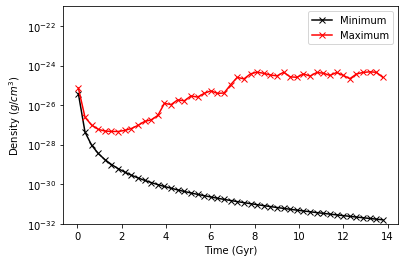

In [13]:
pylab.semilogy(times, rho_ex[:,0], '-xk', label='Minimum')
pylab.semilogy(times, rho_ex[:,1], '-xr', label='Maximum')
pylab.ylabel("Density ($g/cm^3$)")
pylab.xlabel("Time (Gyr)")
pylab.legend()
pylab.ylim(1e-32, 1e-21)
pylab.show()

### Example 2: Advanced Time Series

Let's do something a bit different.  Let's calculate the total mass inside halos and outside halos.

This actually touches a lot of different pieces of machinery in yt.  For every dataset, we will run the halo finder HOP.  Then, we calculate the total mass in the domain.  Then, for each halo, we calculate the sum of the baryon mass in that halo.  We'll keep running tallies of these two things.

##  We should also talk about domain specific analysis like halo finding 

In [14]:
from yt.units import Msun

mass = []
zs = []
for ds in ts:
    halos = HaloFinder(ds)
    dd = ds.all_data()
    total_mass = dd.quantities.total_quantity("cell_mass").in_units("Msun")
    total_in_baryons = 0.0*Msun
    for halo in halos:
        sp = halo.get_sphere()
        total_in_baryons += sp.quantities.total_quantity("cell_mass").in_units("Msun")
    mass.append(total_in_baryons/total_mass)
    zs.append(ds.current_redshift)

yt : [INFO     ] 2020-06-01 10:03:07,421 Parameters: current_time              = 0.8165104336731
yt : [INFO     ] 2020-06-01 10:03:07,422 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 10:03:07,425 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 10:03:07,426 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 10:03:07,427 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 10:03:07,431 Parameters: current_redshift          = 49.999999864349
yt : [INFO     ] 2020-06-01 10:03:07,433 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 10:03:07,434 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 10:03:07,436 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 10:03:07,441 Parameters: hubble_constant           = 0.702
Parsing Hierarchy : 100%|██████████| 2/2 [00:00<00:00, 5679.49it/s]
yt : [INFO     ] 2020-06-01 10:03

yt : [INFO     ] 2020-06-01 10:03:20,296 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 10:03:20,298 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 10:03:20,300 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 10:03:20,305 Parameters: hubble_constant           = 0.702
Parsing Hierarchy : 100%|██████████| 24/24 [00:00<00:00, 4623.31it/s]
yt : [INFO     ] 2020-06-01 10:03:20,331 Gathering a field list (this may take a moment.)
yt : [WARNING  ] 2020-06-01 10:03:21,472 dm_only is deprecated.  Use ptype to specify a particle type, instead.
yt : [INFO     ] 2020-06-01 10:03:21,689 Initializing HOP
yt : [INFO     ] 2020-06-01 10:03:22,845 Parsing outputs
yt : [INFO     ] 2020-06-01 10:03:22,883 Parameters: current_time              = 35.81647513841
yt : [INFO     ] 2020-06-01 10:03:22,886 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 10:03:22,889 Parameters: domain_left_edge          

yt : [WARNING  ] 2020-06-01 10:03:40,737 dm_only is deprecated.  Use ptype to specify a particle type, instead.
yt : [INFO     ] 2020-06-01 10:03:41,363 Initializing HOP
yt : [INFO     ] 2020-06-01 10:03:43,229 Parsing outputs
yt : [INFO     ] 2020-06-01 10:03:44,300 Parameters: current_time              = 65.816603824838
yt : [INFO     ] 2020-06-01 10:03:44,301 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 10:03:44,302 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 10:03:44,304 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 10:03:44,306 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 10:03:44,312 Parameters: current_redshift          = 1.6939415226014
yt : [INFO     ] 2020-06-01 10:03:44,313 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 10:03:44,314 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 10:03:44,315 Param

yt : [INFO     ] 2020-06-01 10:04:17,406 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 10:04:17,412 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 10:04:17,413 Parameters: current_redshift          = 1.0639484710526
yt : [INFO     ] 2020-06-01 10:04:17,414 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 10:04:17,414 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 10:04:17,417 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 10:04:17,418 Parameters: hubble_constant           = 0.702
Parsing Hierarchy : 100%|██████████| 104/104 [00:00<00:00, 7431.26it/s]
yt : [INFO     ] 2020-06-01 10:04:17,450 Gathering a field list (this may take a moment.)
yt : [WARNING  ] 2020-06-01 10:04:18,542 dm_only is deprecated.  Use ptype to specify a particle type, instead.
yt : [INFO     ] 2020-06-01 10:04:19,563 Initializing HOP
yt : [INFO     ] 2020-06-01 10:04:22,060 Parsing o

yt : [INFO     ] 2020-06-01 10:04:58,596 Parameters: hubble_constant           = 0.702
Parsing Hierarchy : 100%|██████████| 132/132 [00:00<00:00, 6753.62it/s]
yt : [INFO     ] 2020-06-01 10:04:58,635 Gathering a field list (this may take a moment.)
yt : [WARNING  ] 2020-06-01 10:04:59,662 dm_only is deprecated.  Use ptype to specify a particle type, instead.
yt : [INFO     ] 2020-06-01 10:05:00,890 Initializing HOP
yt : [INFO     ] 2020-06-01 10:05:03,870 Parsing outputs
yt : [INFO     ] 2020-06-01 10:05:06,428 Parameters: current_time              = 130.81663338874
yt : [INFO     ] 2020-06-01 10:05:06,429 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 10:05:06,429 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 10:05:06,433 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 10:05:06,433 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 10:05:06,435 Parameters: current_redshif

yt : [INFO     ] 2020-06-01 10:05:56,055 Parameters: current_time              = 160.81658117507
yt : [INFO     ] 2020-06-01 10:05:56,056 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 10:05:56,056 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 10:05:56,057 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 10:05:56,060 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 10:05:56,061 Parameters: current_redshift          = 0.38466029561352
yt : [INFO     ] 2020-06-01 10:05:56,062 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 10:05:56,066 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 10:05:56,068 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 10:05:56,070 Parameters: hubble_constant           = 0.702
Parsing Hierarchy : 100%|██████████| 146/146 [00:00<00:00, 9563.18it/s]
yt : [INFO     ] 2020-06-01 

yt : [INFO     ] 2020-06-01 10:07:00,813 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 10:07:00,814 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 10:07:00,815 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-01 10:07:00,817 Parameters: hubble_constant           = 0.702
Parsing Hierarchy : 100%|██████████| 189/189 [00:00<00:00, 9339.78it/s]
yt : [INFO     ] 2020-06-01 10:07:00,855 Gathering a field list (this may take a moment.)
yt : [WARNING  ] 2020-06-01 10:07:01,858 dm_only is deprecated.  Use ptype to specify a particle type, instead.
yt : [INFO     ] 2020-06-01 10:07:03,586 Initializing HOP
yt : [INFO     ] 2020-06-01 10:07:07,539 Parsing outputs
yt : [INFO     ] 2020-06-01 10:07:10,566 Parameters: current_time              = 195.81653361057
yt : [INFO     ] 2020-06-01 10:07:10,567 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 10:07:10,568 Parameters: domain_left_edge       

yt : [WARNING  ] 2020-06-01 10:08:02,470 dm_only is deprecated.  Use ptype to specify a particle type, instead.
yt : [INFO     ] 2020-06-01 10:08:04,739 Initializing HOP
yt : [INFO     ] 2020-06-01 10:08:09,917 Parsing outputs
yt : [INFO     ] 2020-06-01 10:08:13,531 Parameters: current_time              = 225.81659302522
yt : [INFO     ] 2020-06-01 10:08:13,532 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 10:08:13,533 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 10:08:13,535 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 10:08:13,537 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-01 10:08:13,538 Parameters: current_redshift          = 0.021113609082468
yt : [INFO     ] 2020-06-01 10:08:13,540 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-06-01 10:08:13,542 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-06-01 10:08:13,548 Par

Now let's plot them!

/Users/swalkow2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


(-0.01, 0.18)

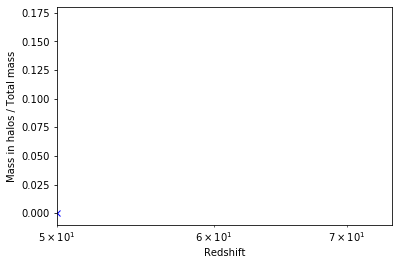

In [15]:
pylab.semilogx(zs, mass, '-xb')
pylab.xlabel("Redshift")
pylab.ylabel("Mass in halos / Total mass")
pylab.xlim(max(zs), min(zs))
pylab.ylim(-0.01, .18)

## Data Objects

Time series data have many applications, but most of them rely on examining the underlying data in some way.  Below, we'll see how to use and manipulate data objects.

### Ray Queries

yt provides the ability to examine rays, or lines, through the domain.  Note that these are not periodic, unlike most other data objects.  We create a ray object and can then examine quantities of it.  Rays have the special fields `t` and `dts`, which correspond to the time the ray enters a given cell and the distance it travels through that cell.

To create a ray, we specify the start and end points.

Note that we need to convert these arrays to numpy arrays due to a bug in matplotlib 1.3.1.

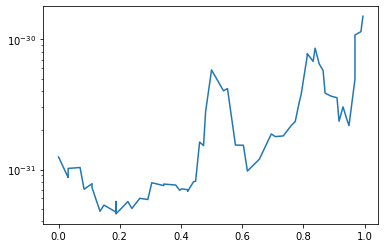

In [16]:
ray = ds.ray([0.1, 0.2, 0.3], [0.9, 0.8, 0.7])
pylab.semilogy(np.array(ray["t"]), np.array(ray["density"]))

In [17]:
print (ray["dts"])

[3.12500000e-02 1.38777878e-17 3.46944695e-17 3.90625000e-02
 1.30208333e-02 2.60416667e-02 2.77555756e-17 2.60416667e-02
 1.30208333e-02 3.90625000e-02 5.55111512e-17 2.77555756e-17
 3.90625000e-02 1.30208333e-02 2.60416667e-02 2.60416667e-02
 1.30208333e-02 3.90625000e-02 1.11022302e-16 3.90625000e-02
 1.30208333e-02 6.51041667e-03 1.95312500e-02 5.55111512e-17
 1.95312500e-02 6.51041667e-03 1.30208333e-02 1.30208333e-02
 6.51041667e-03 1.95312500e-02 3.90625000e-02 1.30208333e-02
 2.60416667e-02 2.60416667e-02 1.30208333e-02 3.90625000e-02
 3.90625000e-02 1.30208333e-02 2.60416667e-02 2.60416667e-02
 1.30208333e-02 1.30208333e-02 6.51041667e-03 1.95312500e-02
 1.11022302e-16 1.95312500e-02 6.51041667e-03 1.30208333e-02
 1.30208333e-02 6.51041667e-03 1.95312500e-02 1.95312500e-02
 6.51041667e-03 1.30208333e-02 1.30208333e-02 6.51041667e-03
 1.95312500e-02 1.11022302e-16 1.95312500e-02 6.51041667e-03
 5.20833333e-03] dimensionless


In [18]:
print (ray["t"])

[0.         0.03125    0.03125    0.03125    0.0703125  0.08333333
 0.109375   0.109375   0.13541667 0.1484375  0.1875     0.1875
 0.1875     0.2265625  0.23958333 0.265625   0.29166667 0.3046875
 0.34375    0.34375    0.3828125  0.39583333 0.40234375 0.421875
 0.421875   0.44140625 0.44791667 0.4609375  0.47395833 0.48046875
 0.5        0.5390625  0.55208333 0.578125   0.60416667 0.6171875
 0.65625    0.6953125  0.70833333 0.734375   0.76041667 0.7734375
 0.78645833 0.79296875 0.8125     0.8125     0.83203125 0.83854167
 0.8515625  0.86458333 0.87109375 0.890625   0.91015625 0.91666667
 0.9296875  0.94270833 0.94921875 0.96875    0.96875    0.98828125
 0.99479167] dimensionless


In [19]:
print (ray["x"])

[1.53844324e+25 1.53844324e+25 1.97799845e+25 1.97799845e+25
 2.41755367e+25 2.41755367e+25 2.85710888e+25 2.85710888e+25
 2.85710888e+25 3.29666409e+25 3.29666409e+25 3.73621930e+25
 3.73621930e+25 4.17577452e+25 4.17577452e+25 4.61532973e+25
 4.61532973e+25 5.05488494e+25 5.05488494e+25 5.49444015e+25
 5.82410656e+25 5.82410656e+25 6.04388417e+25 6.04388417e+25
 6.26366177e+25 6.48343938e+25 6.48343938e+25 6.70321699e+25
 6.70321699e+25 6.92299459e+25 7.25266100e+25 7.69221621e+25
 7.69221621e+25 8.13177143e+25 8.13177143e+25 8.57132664e+25
 9.01088185e+25 9.45043706e+25 9.45043706e+25 9.88999227e+25
 9.99988108e+25 1.02196587e+26 1.02196587e+26 1.04394363e+26
 1.04394363e+26 1.06592139e+26 1.08789915e+26 1.08789915e+26
 1.10987691e+26 1.10987691e+26 1.13185467e+26 1.15383243e+26
 1.17581019e+26 1.17581019e+26 1.19778795e+26 1.19778795e+26
 1.21976571e+26 1.21976571e+26 1.24174347e+26 1.26372124e+26
 1.26372124e+26] cm


### Slice Queries

While slices are often used for visualization, they can be useful for other operations as well.  yt regards slices as multi-resolution objects.  They are an array of cells that are not all the same size; it only returns the cells at the highest resolution that it intersects.  (This is true for all yt data objects.)  Slices and projections have the special fields `px`, `py`, `pdx` and `pdy`, which correspond to the coordinates and half-widths in the pixel plane.

In [20]:
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")
v, c = ds.find_max("density")
sl = ds.slice(2, c[0])
print (sl["index", "x"])
print (sl["index", "z"])
print (sl["pdx"])
print (sl["gas", "density"].shape)

yt : [INFO     ] 2020-06-01 10:09:22,920 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-06-01 10:09:22,921 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-06-01 10:09:22,922 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-01 10:09:22,923 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-01 10:09:22,927 Parameters: cosmological_simulation   = 0.0
Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 4307.34it/s]
yt : [INFO     ] 2020-06-01 10:09:23,018 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-06-01 10:09:25,670 Max Value is 7.73427e-24 at 0.5040893554687501 0.4998168945312501 0.5001831054687500


[0.015625   0.015625   0.015625   ... 0.49743652 0.49743652 0.49743652] code_length
[0.515625   0.515625   0.515625   ... 0.50402832 0.50402832 0.50402832] code_length
[0.015625   0.015625   0.015625   ... 0.00012207 0.00012207 0.00012207] code_length
(35308,)


##  Working with maximum operators again 
- for the fields agruement in max, I converted the field list data to a string (not sure if this is what we want)

In [32]:
c

YTArray([0.50408936, 0.49981689, 0.50018311]) code_length

In [34]:
ds_max = analysis_schema.Maximum(maximum= str(v), field= ("density", str(c)), axis='x')

In [35]:
ds_max

<Maximum maximum='7.73426503924e-24 g/cm**3' field=('density', '[0.50408936 0.49981689 0.50018311] code_length') axis='x'>

If we want to do something interesting with a `Slice`, we can turn it into a `FixedResolutionBuffer`.  This object can be queried and will return a 2D array of values.

In [21]:
frb = sl.to_frb((50.0, 'kpc'), 1024)
print (frb["gas", "density"].shape)

yt : [INFO     ] 2020-06-01 10:09:25,823 Making a fixed resolution buffer of (('gas', 'density')) 1024 by 1024


(1024, 1024)


yt provides a few functions for writing arrays to disk, particularly in image form.  Here we'll write out the log of `density`, and then use IPython to display it back here.  Note that for the most part, you will probably want to use a `PlotWindow` for this, but in the case that it is useful you can directly manipulate the data.

## Tried to make slice into a fixed resolution buffer

In [51]:
frb_schema = analysis_schema.FixedResolutionBuffer(bounds=[analysis_schema.UnitfulValue(value=50.0),
                                                          analysis_schema.UnitfulValue(value=50.0)], 
                                                  buff_size = (1024, 1024))

In [52]:
frb_schema

<FixedResolutionBuffer bounds=[<UnitfulValue value=50.0 unit='unitary'>, <UnitfulValue value=50.0 unit='unita… buff_size=(1024, 1024) period=None data={} antialias=True periodic=False filters=[] axis=0 data_source=None ds=None>

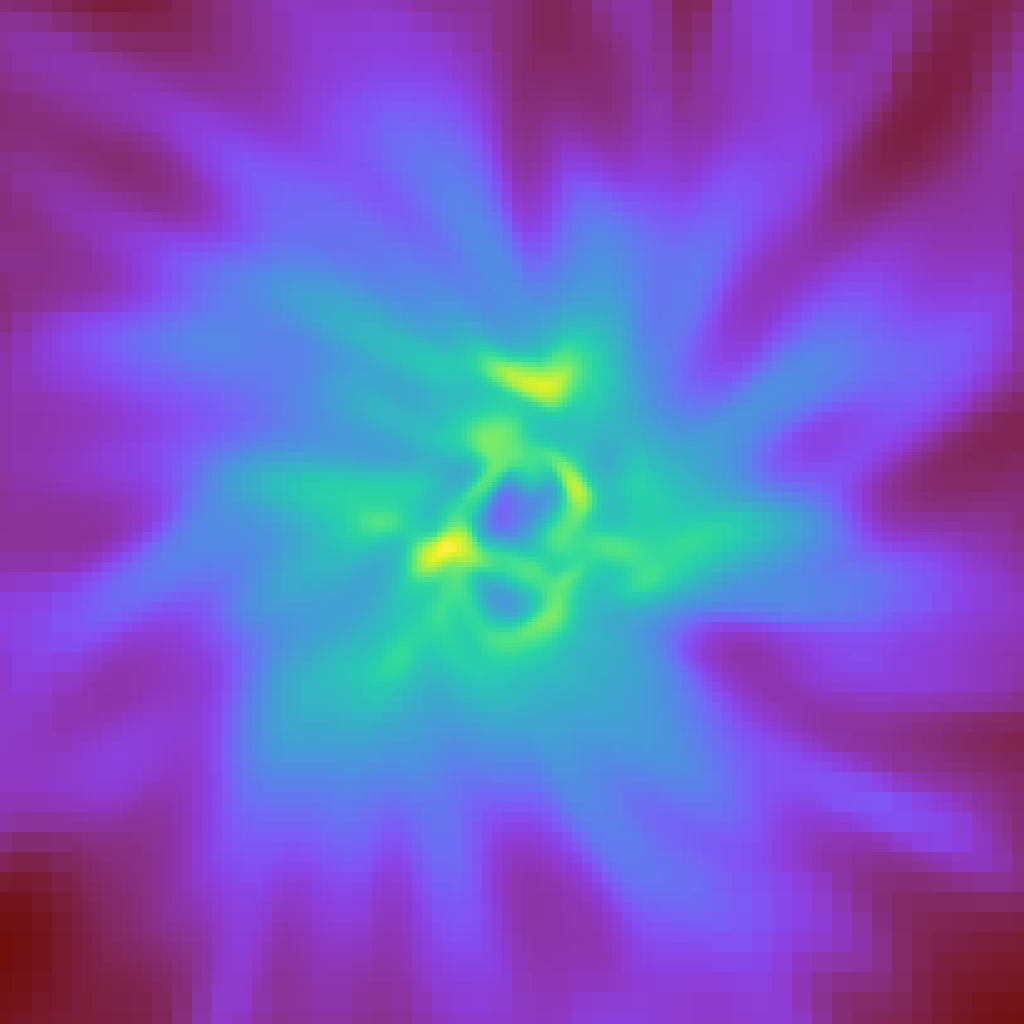

In [22]:
yt.write_image(np.log10(frb["gas", "density"]), "temp.png")
from IPython.display import Image
Image(filename="temp.png")

### Off-Axis Slices

yt provides not only slices, but off-axis slices that are sometimes called "cutting planes."  These are specified by (in order) a normal vector and a center.  Here we've set the normal vector to `[0.2, 0.3, 0.5]` and the center to be the point of maximum density.

We can then turn these directly into plot windows using `to_pw`.  Note that the `to_pw` and `to_frb` methods are available on slices, off-axis slices, and projections, and can be used on any of them.

In [23]:
cp = ds.cutting([0.2, 0.3, 0.5], "max")
pw = cp.to_pw(fields=[("gas", "density")])

yt : [INFO     ] 2020-06-01 10:09:32,400 Max Value is 7.73427e-24 at 0.5040893554687501 0.4998168945312501 0.5001831054687500
yt : [INFO     ] 2020-06-01 10:09:32,443 xlim = -0.500000 0.500000
yt : [INFO     ] 2020-06-01 10:09:32,446 ylim = -0.500000 0.500000
yt : [INFO     ] 2020-06-01 10:09:32,448 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


Once we have our plot window from our cutting plane, we can show it here.


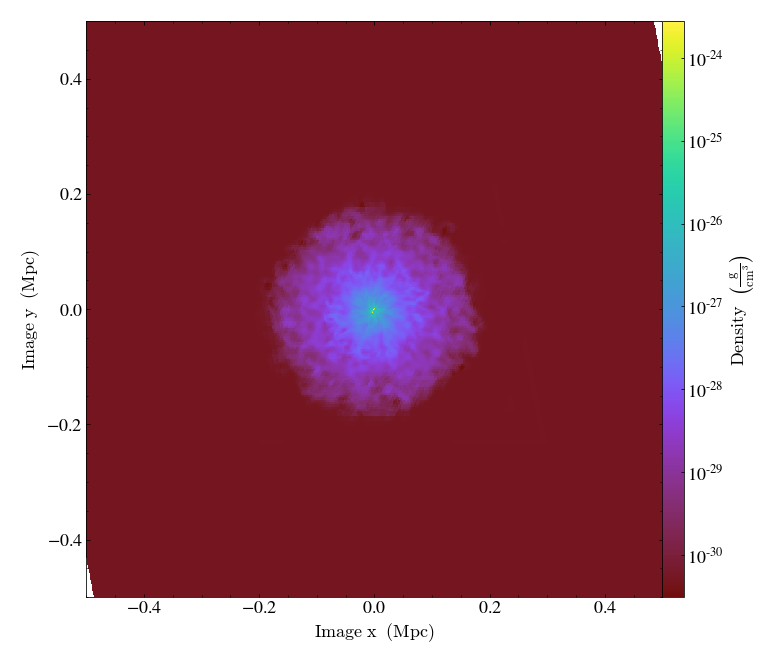

In [24]:
pw.show()

yt : [INFO     ] 2020-06-01 10:09:33,694 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



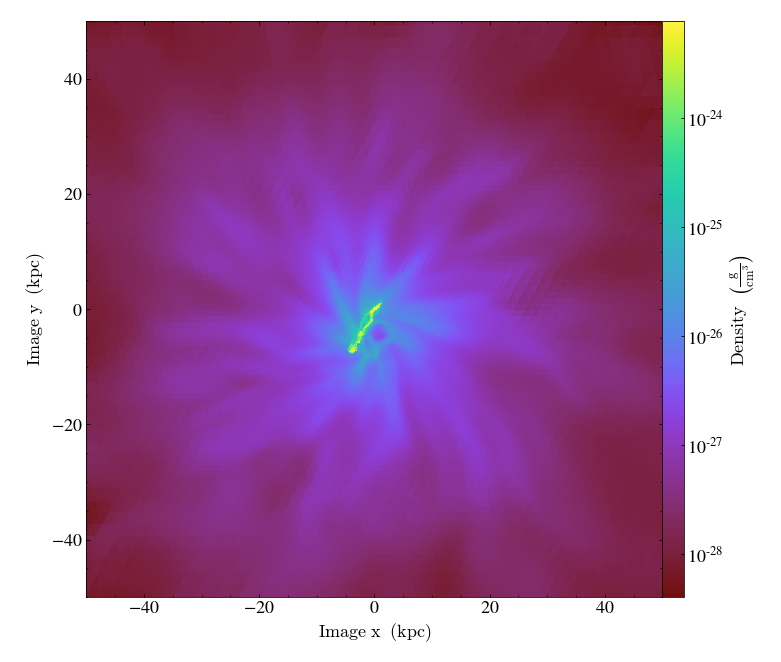

In [25]:
pw.zoom(10)

We can, as noted above, do the same with our slice:

In [26]:
pws = sl.to_pw(fields=["density"])
#pws.show()
print (list(pws.plots.keys()))

yt : [INFO     ] 2020-06-01 10:09:37,534 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-06-01 10:09:37,537 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-06-01 10:09:37,540 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2020-06-01 10:09:37,560 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


[('gas', 'density')]


### Covering Grids

If we want to access a 3D array of data that spans multiple resolutions in our simulation, we can use a covering grid.  This will return a 3D array of data, drawing from up to the resolution level specified when creating the data.  For example, if you create a covering grid that spans two child grids of a single parent grid, it will fill those zones covered by a zone of a child grid with the data from that child grid.  Where it is covered only by the parent grid, the cells from the parent grid will be duplicated (appropriately) to fill the covering grid.

There are two different types of covering grids: unsmoothed and smoothed.  Smoothed grids will be filled through a cascading interpolation process; they will be filled at level 0, interpolated to level 1, filled at level 1, interpolated to level 2, filled at level 2, etc.  This will help to reduce edge effects.  Unsmoothed covering grids will not be interpolated, but rather values will be duplicated multiple times.

Here we create an unsmoothed covering grid at level 2, with the left edge at `[0.0, 0.0, 0.0]` and with dimensions equal to those that would cover the entire domain at level 2.  We can then ask for the Density field, which will be a 3D array.

In [27]:
cg = ds.covering_grid(2, [0.0, 0.0, 0.0], ds.domain_dimensions * 2**2)
print (cg["density"].shape)

(128, 128, 128)


In this example, we do exactly the same thing: except we ask for a *smoothed* covering grid, which will reduce edge effects.

In [28]:
scg = ds.smoothed_covering_grid(2, [0.0, 0.0, 0.0], ds.domain_dimensions * 2**2)
print (scg["density"].shape)

(128, 128, 128)
